# 📰 Fake News Detection Project

In [1]:
# 1️⃣ Install & Import Libraries
!pip install wordcloud

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hebatuallah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load Dataset
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Add labels
fake["label"] = 0   # Fake = 0
true["label"] = 1   # Real = 1

# Combine & Shuffle
df = pd.concat([fake, true])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [3]:
# Preprocessing Function (Fast Version)
def clean_text_fast(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation & numbers
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df["content"] = (df["title"].fillna('') + " " + df["text"].fillna('')).astype(str)
df["cleaned"] = df["content"].apply(clean_text_fast)

print("✅ Data cleaned successfully!")
df[["content","cleaned","label"]].head()

✅ Data cleaned successfully!


,content,cleaned,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,ben stein calls th circuit court committed cou...,0
1,Trump drops Steve Bannon from National Securit...,trump drops steve bannon national security cou...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,puerto rico expects us lift jones act shipping...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,oops trump accidentally confirmed leaked israe...,0
4,Donald Trump heads for Scotland to reopen a go...,donald trump heads scotland reopen golf resort...,1


In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned"], df["label"], test_size=0.2, random_state=42
)

In [5]:
#TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Accuracy: 0.987305122494432
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [7]:
# SVM Classifier
svm = LinearSVC()
svm.fit(X_train_vec, y_train)
y_pred_svm = svm.predict(X_test_vec)

print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

C:\Users\Hebatuallah\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


🔹 SVM Accuracy: 0.994097995545657
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4710
           1       0.99      1.00      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



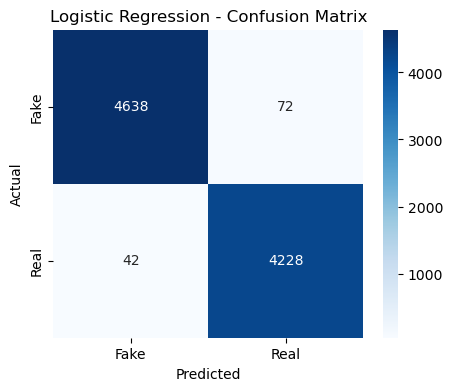

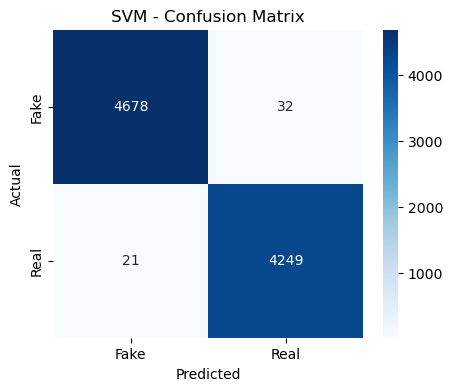

In [8]:
# Confusion Matrix Plot
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Fake", "Real"],
                yticklabels=["Fake", "Real"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_svm, "SVM")

In [ ]:

fake_words = " ".join(df[df["label"]==0]["cleaned"])
real_words = " ".join(df[df["label"]==1]["cleaned"])

wordcloud_fake = WordCloud(width=800, height=400, background_color="black").generate(fake_words)
wordcloud_real = WordCloud(width=800, height=400, background_color="white").generate(real_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Fake News Words")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Real News Words")
plt.show()